# Police Shootings in USA

To create this analysis, only the information contained in the original dataset was analyzed. The proportion of the population of ethnic groups in North American territory, such an analysis would probably reveal a more xenophobic and racist face of the U.S police forces. <br><br><b>#BlackLivesMatter</b>

In [3]:
import pandas as pd
import seaborn as sns

In [17]:
file= 'inputs/shootings.csv'
df= pd.read_csv(file)
df.sample(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
805,969,Noah Harpham,2015-10-31,shot,gun,33.0,M,White,Colorado Springs,CO,False,attack,Not fleeing,False,Guns
1110,1304,Rouven Loch,2016-02-22,shot,toy weapon,22.0,M,White,Fairborn,OH,False,other,Not fleeing,False,Other unusual objects


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

## Gender Analysis

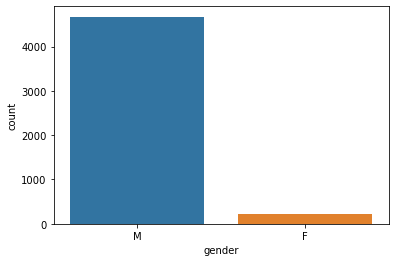

In [7]:
ax= sns.countplot(x=df['gender'], data= df)

In [8]:
gender_EDA= (df['gender'].value_counts(normalize= True)*100).round(2)
print(f'{gender_EDA.M}% of deaths caused by  U.S police are men.')

95.46% of deaths caused by  U.S police are men.


## Age analysis

In [9]:
age= df['age'].value_counts().to_frame().T
age.index= ['Total']
age

,25.0,31.0,27.0,33.0,29.0,32.0,34.0,24.0,28.0,30.0,...,80.0,83.0,6.0,82.0,13.0,12.0,79.0,81.0,78.0,91.0
Total,176,174,165,164,160,159,159,152,150,146,...,2,2,2,2,1,1,1,1,1,1


In [10]:
age_slice= [0,10,20,30,40,50,60,70,80,90,100] #USAR UMA FUNÇÂO PRA GERAR 
labels= ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
age_EDA= (pd.cut(x=df['age'], bins= age_slice,labels=labels, include_lowest=True)).value_counts(sort= False)
age_EDA

0-10         2
10-20      360
20-30     1426
30-40     1507
40-50      859
50-60      505
60-70      186
70-80       40
80-90        9
90-100       1
Name: age, dtype: int64

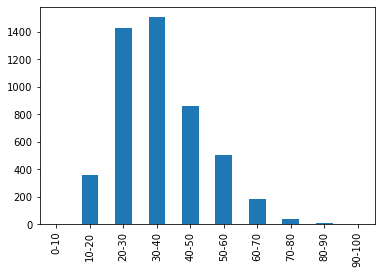

In [11]:
ax= age_EDA.plot.bar(figsize= (6,4))

In [12]:
print('Most of the deaths occured between citizens with 20 and 40 years.')

Most of the deaths occured between citizens with 20 and 40 years.


## Race analysis

In [18]:
races= df['race'].value_counts().to_frame()
races.columns= ['Deaths']
races

,Deaths
White,2476
Black,1298
Hispanic,902
Asian,93
Native,78
Other,48


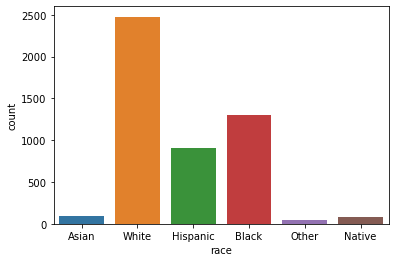

In [19]:
ax= sns.countplot(x='race', data= df)

In [20]:
race_EDA= df.groupby('race')['age'].mean()
race_EDA

race
Asian       36.561676
Black       32.549946
Hispanic    33.683847
Native      31.732281
Other       33.064957
White       39.909488
Name: age, dtype: float64

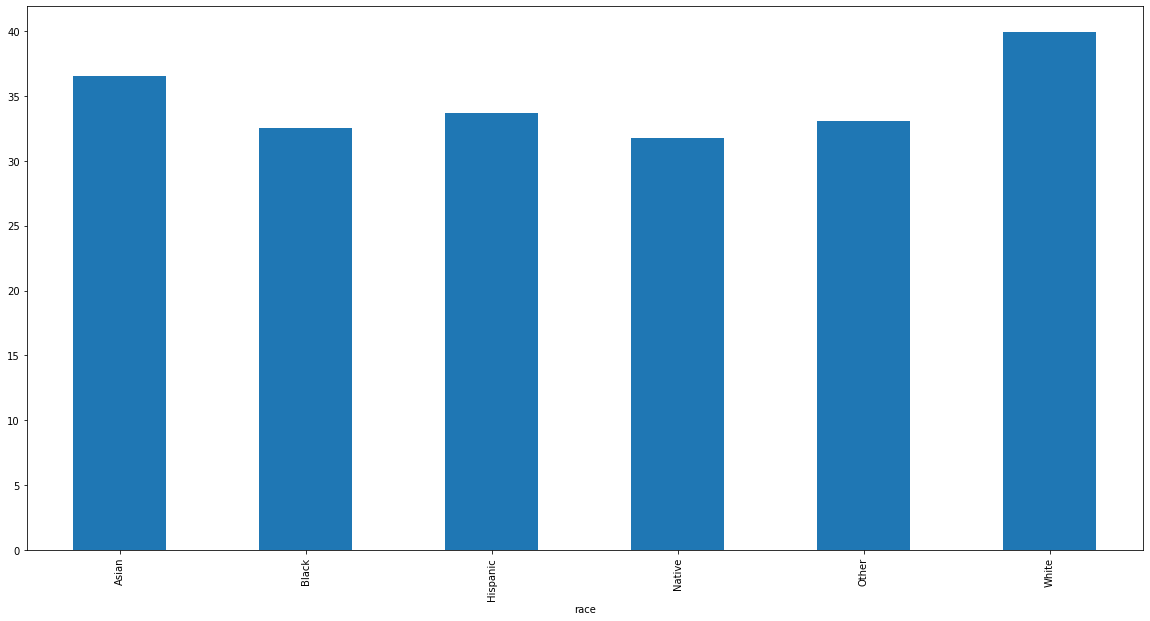

In [21]:
ax= race_EDA.plot.bar(figsize= (20,10))

In [22]:
print('All victims have an approximate average age, however the average age of white people is higher than other races.')

All victims have an approximate average age, however the average age of white people is higher than other races.


In [23]:
race_EDA= pd.crosstab(df['state'], df['race'])
race_EDA

race,Asian,Black,Hispanic,Native,Other,White
state,,,,,,
AK,2,3,0,9,0,22
AL,0,31,1,0,0,63
AR,1,26,0,0,0,46
AZ,0,17,83,13,0,109
CA,29,122,316,4,9,221
CO,5,18,48,4,2,91
CT,0,3,6,0,0,11
DC,0,12,0,0,0,1
DE,0,5,0,0,0,5


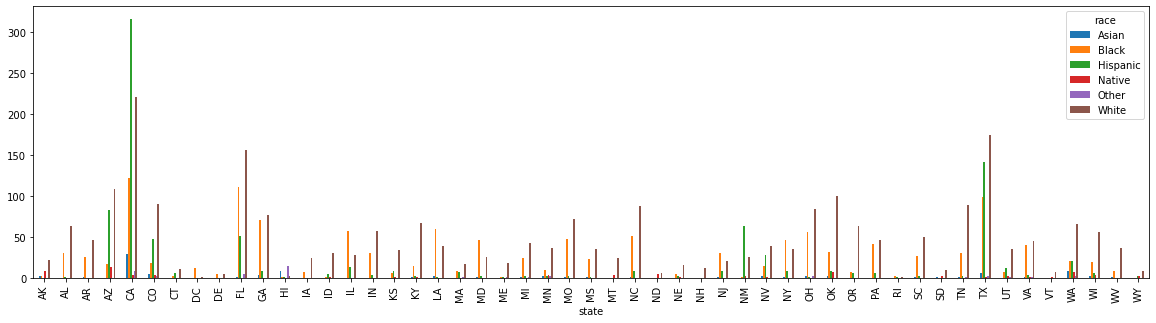

In [24]:
ax= race_EDA.plot.bar(figsize= (20,5))

In [25]:
print('States like Arizona and New Mexico have a much higher death rate against Hispanics compared to other states. Whereas states like Illinois, West Virginia, New Jersey, Maryland and Louisiania are more common the death of black citiezens in comparison to the others.')

States like Arizona and New Mexico have a much higher death rate against Hispanics compared to other states. Whereas states like Illinois, West Virginia, New Jersey, Maryland and Louisiania are more common the death of black citiezens in comparison to the others.


## Armed and Unarmed deaths analysis

In [26]:
df['armed'].value_counts()
unarmed= df.query('armed == "unarmed"')['armed'].count()
armed= df.query('armed != "unarmed"')['armed'].count()

print(f'In the total was killed {armed} U.S citiezens armed and {unarmed} U.S citiziezens unarmed')

In the total was killed 4547 U.S citiezens armed and 348 U.S citiziezens unarmed


In [27]:
(df['armed'].value_counts(normalize= True)*100).round(2)

gun                56.28
knife              14.46
unknown             8.54
unarmed             7.11
toy weapon          3.49
                   ...  
bean-bag gun        0.02
metal hand tool     0.02
carjack             0.02
pepper spray        0.02
ice pick            0.02
Name: armed, Length: 89, dtype: float64

In [28]:
print('The most common weapons is the gun, followed by knife. But in the thrid place the most of victims were unarmed')

The most common weapons is the gun, followed by knife. But in the thrid place the most of victims were unarmed


In [29]:
unarmed_deaths= pd.crosstab(df['state'],df['armed']== 'unarmed')
unarmed_deaths.columns= ['No','Yes']
unarmed_deaths

,No,Yes
state,,
AK,33,3
AL,91,4
AR,70,3
AZ,206,16
CA,644,57
CO,159,9
CT,18,2
DC,12,1
DE,10,0


In [30]:
unarmed_deaths['Yes_%']= (unarmed_deaths['Yes']/(unarmed_deaths['No'] + unarmed_deaths['Yes'])*100).round(2)
unarmed_deaths

,No,Yes,Yes_%
state,,,
AK,33,3,8.33
AL,91,4,4.21
AR,70,3,4.11
AZ,206,16,7.21
CA,644,57,8.13
CO,159,9,5.36
CT,18,2,10.00
DC,12,1,7.69
DE,10,0,0.00


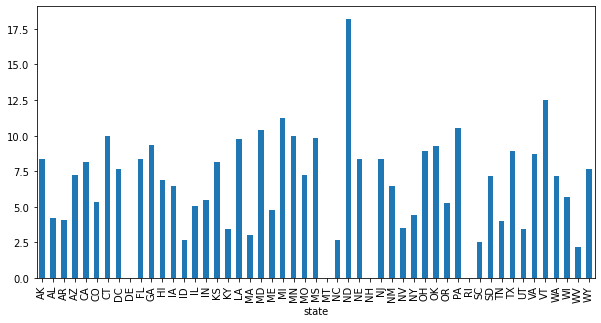

In [31]:
ax= unarmed_deaths['Yes_%'].plot.bar(figsize= (10,5))

In [32]:
print('North Dakota, Vermont and Maryland are the top three states with the highest unarmed death toll.')

North Dakota, Vermont and Maryland are the top three states with the highest unarmed death toll.


In [33]:
race_arm= pd.crosstab(df['race'], df['armed']=='unarmed', normalize= True)
race_arm.columns= ['No', 'Yes']
race_arm

,No,Yes
race,,
Asian,0.017569,0.001430
Black,0.240041,0.025128
Hispanic,0.171399,0.012870
Native,0.015117,0.000817
Other,0.008784,0.001021
White,0.475996,0.029826


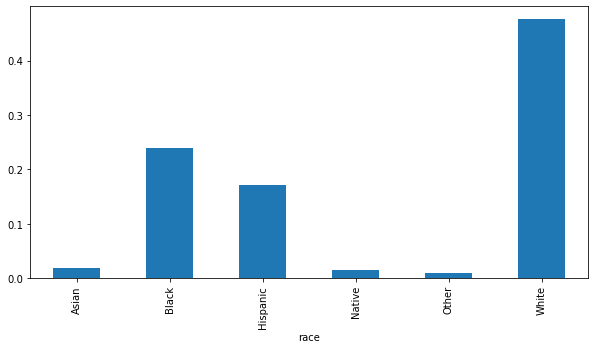

In [34]:
ax= race_arm['No'].plot.bar(figsize= (10,5))

## Mental Illness Analysis

In [35]:
mental_illness= df['signs_of_mental_illness'].value_counts()
mental_illness

False    3792
True     1103
Name: signs_of_mental_illness, dtype: int64

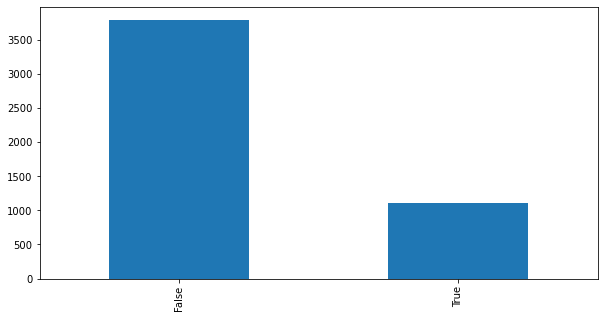

In [36]:
ax= mental_illness.plot.bar(figsize= (10,5))

In [37]:
mental_illness= pd.crosstab(df['state'], df['signs_of_mental_illness'])
mental_illness

signs_of_mental_illness,False,True
state,,
AK,31,5
AL,69,26
AR,62,11
AZ,180,42
CA,539,162
CO,145,23
CT,16,4
DC,11,2
DE,7,3


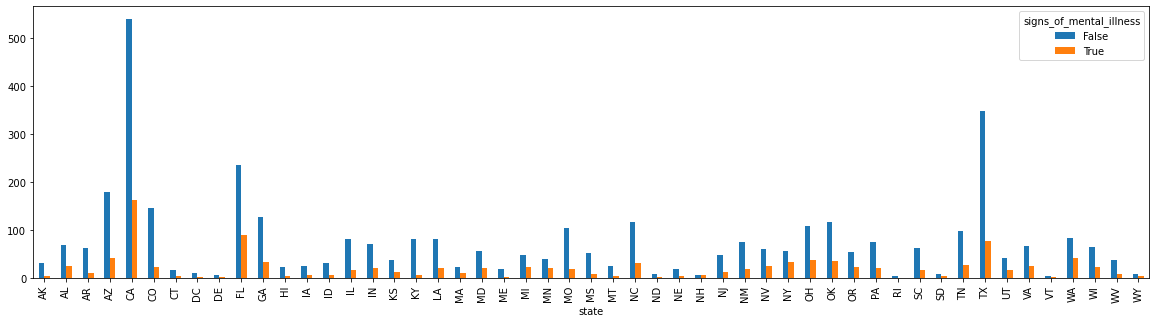

In [38]:
ax= mental_illness.plot.bar(figsize= (20,5))

In [39]:
print('California, texas and florida have the highest rates of police confrontations with possible citizens with signs of mental illness.')

California, texas and florida have the highest rates of police confrontations with possible citizens with signs of mental illness.
